<a href="https://colab.research.google.com/github/priyadarshi0007/TimeSeries-AIEngineering/blob/master/TimeSeriesDecomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The decomposition of time series is a statistical task that deconstructs a time series into several components

Trend component - which reflects the long-term progression of the series - Trend can be positive or negative or both

Seasonal Component - includes cyclical component

Noise or residual - remainder of the time series after the other components have been removed

AR and MA model assumes time series to be stationary  and real-world data - they are often
governed by a (deterministic) trend and they might have (deterministic)
cyclical or seasonal components

In [1]:
!pip install download

In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")


Import Succesfull


In [4]:
def convert_to_date(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv',parse_dates=['Quarter'], date_parser=convert_to_date)

In [10]:
df.head(n=2)

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268


In [15]:
df.tail(n=2)

,Quarter,Revenue,Net Income
59,2005-06-30,1753,52
60,2005-03-31,1902,78


In [12]:
# df.head(n=12)

In [13]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 61
Columns  : 3

 Features 
 ['Quarter', 'Revenue', 'Net Income']

 Missing Values 
 Quarter       False
Revenue       False
Net Income    False
dtype: bool

 Unique Values 
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [14]:
import plotly.express as px
fig = px.line(df, x = 'Quarter',y = 'Revenue',title = 'Amazon Revenue')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 3,label = '1y',step='year',stepmode = "backward"),
                        dict(count = 9,label = '3y',step='year',stepmode = "backward"),
                        dict(count = 15,label = '5y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

Null Hypothesis : Data is stationary
Alternate Hypothesis : Data is not Stationary

In [17]:
from statsmodels.tsa.stattools import kpss
#Kwiatkowski-Phillips-Schmidt-Shin (kpss)

In [19]:
tstest = kpss(df['Revenue'],'ct')

In [21]:
tstest

# 0.17 is the KPSS test stats falls in greater than 2.5% so the Null hypothesis is rejected
#p values is 0.03 which means Null values is rejected
# https://kite.com/python/docs/statsmodels.tsa.stattools.kpss 

(0.1700516821083097,
 0.029956931576408573,
 11,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [22]:
amazon_df = df.set_index('Quarter')

In [23]:
import statsmodels.api as sm
print("statsmodel has been imported")



statsmodel has been imported


In [24]:
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'], 
                                model='multiplicative')

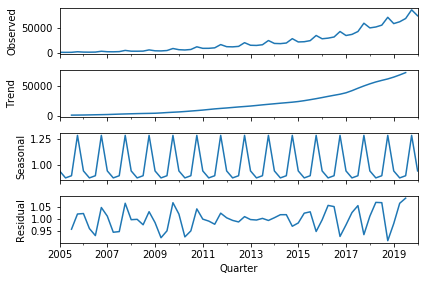

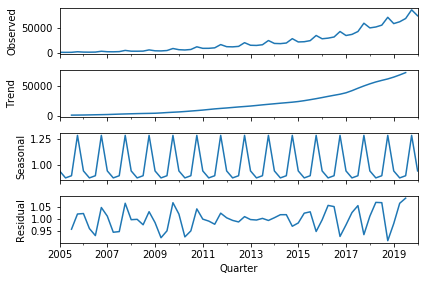

In [25]:
res.plot()

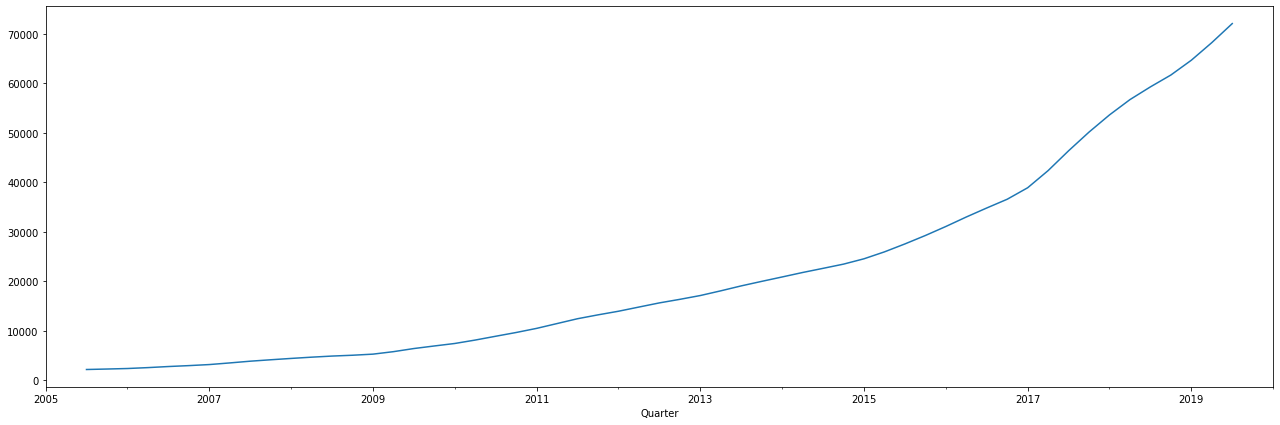

In [26]:
plt.figure(figsize=(22,7))
res.trend.plot()

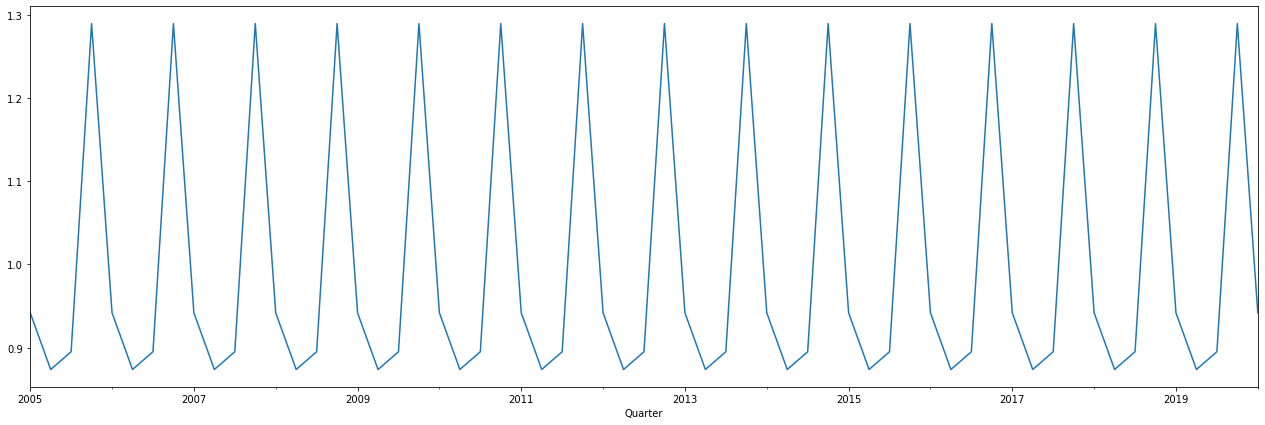

In [27]:
plt.figure(figsize=(22,7))
res.seasonal.plot()

In [28]:
res.observed

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64

In [29]:
print(res.trend)

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: Revenue, Length: 61, dtype: float64


In [30]:
print(res.seasonal)

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: Revenue, Length: 61, dtype: float64


In [31]:
print(res.resid)

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: Revenue, Length: 61, dtype: float64


In [32]:
res.observed[2]

69981

In [33]:
res.seasonal[2]*res.trend[2]*res.resid[2]

69980.99999999999

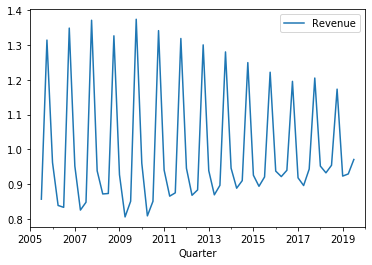

In [34]:
pd.DataFrame(res.observed/res.trend).plot()